<a href="https://colab.research.google.com/github/BigSamu/Prediction_of_Product_Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Samuel Valdes Gutierrez

## Project Overview

This project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

## Data Dictionary

| Variable Name                | Description                                                                                             |
|------------------------------|---------------------------------------------------------------------------------------------------------|
| Item_Identifier              | Product ID                                                                                              |
| Item_Weight                  | Weight of product                                                                                       |
| Item_Fat_Content             | Whether the product is low-fat or regular                                                               |
| Item_Visibility              | The percentage of total display area of all products in a store allocated to the particular product      |
| Item_Type                    | The category to which the product belongs                                                               |
| Item_MRP                     | Maximum Retail Price (list price) of the product                                                        |
| Outlet_Identifier            | Store ID                                                                                                |
| Outlet_Establishment_Year    | The year in which store was established                                                                 |
| Outlet_Size                  | The size of the store in terms of ground area covered                                                   |
| Outlet_Location_Type         | The type of area in which the store is located                                                          |
| Outlet_Type                  | Whether the outlet is a grocery store or some sort of supermarket                                       |
| Item_Outlet_Sales            | Sales of the product in the particular store. This is the target variable to be predicted.              |


## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading

In [104]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Save the filepath and load the data as "df_titanic"
file_path =  "/content/drive/MyDrive/Coding_Dojo_Data_Science_Excercises/FP_Prediction_of_Product_Sales/data/sales_predictions_2023.csv"
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
# Making a copy for future manipulation
df2 = df.copy()

In [106]:
# Checking first 10 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [107]:
# Checking info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- Upon initial inspection all datatypes look Ok for this data

## Data Cleaning

### 1. How many rows and columns?

In [108]:
# Getting dimmensions of dataframe
df.shape

(8523, 12)

- There are 8523 rows and 12 columns


### 2. What are the datatypes of each variable?

In [109]:
# Getting information of datatypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### 3. Are there duplicates? If so, drop any duplicates.

In [110]:
# Getting number of duplicated rows
df.duplicated().sum()

0

- No duplicated rows are found

### 4. Identify missing values.

In [111]:
# Checking for missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [112]:
# Indetifying % of missing data
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Missing Values:
  - There are 1463 missing values for column *Item_Wight* (17.16% from total)
  - There are 2410 missing values for column *Outlet_Size* (28.27% from total)

- Doing some more EDA (Exploratory Data Analysis) to check data

### 5. Decide on how to address the missing values.

**Note:** This requires your judgement, so explain your choice

<Axes: >

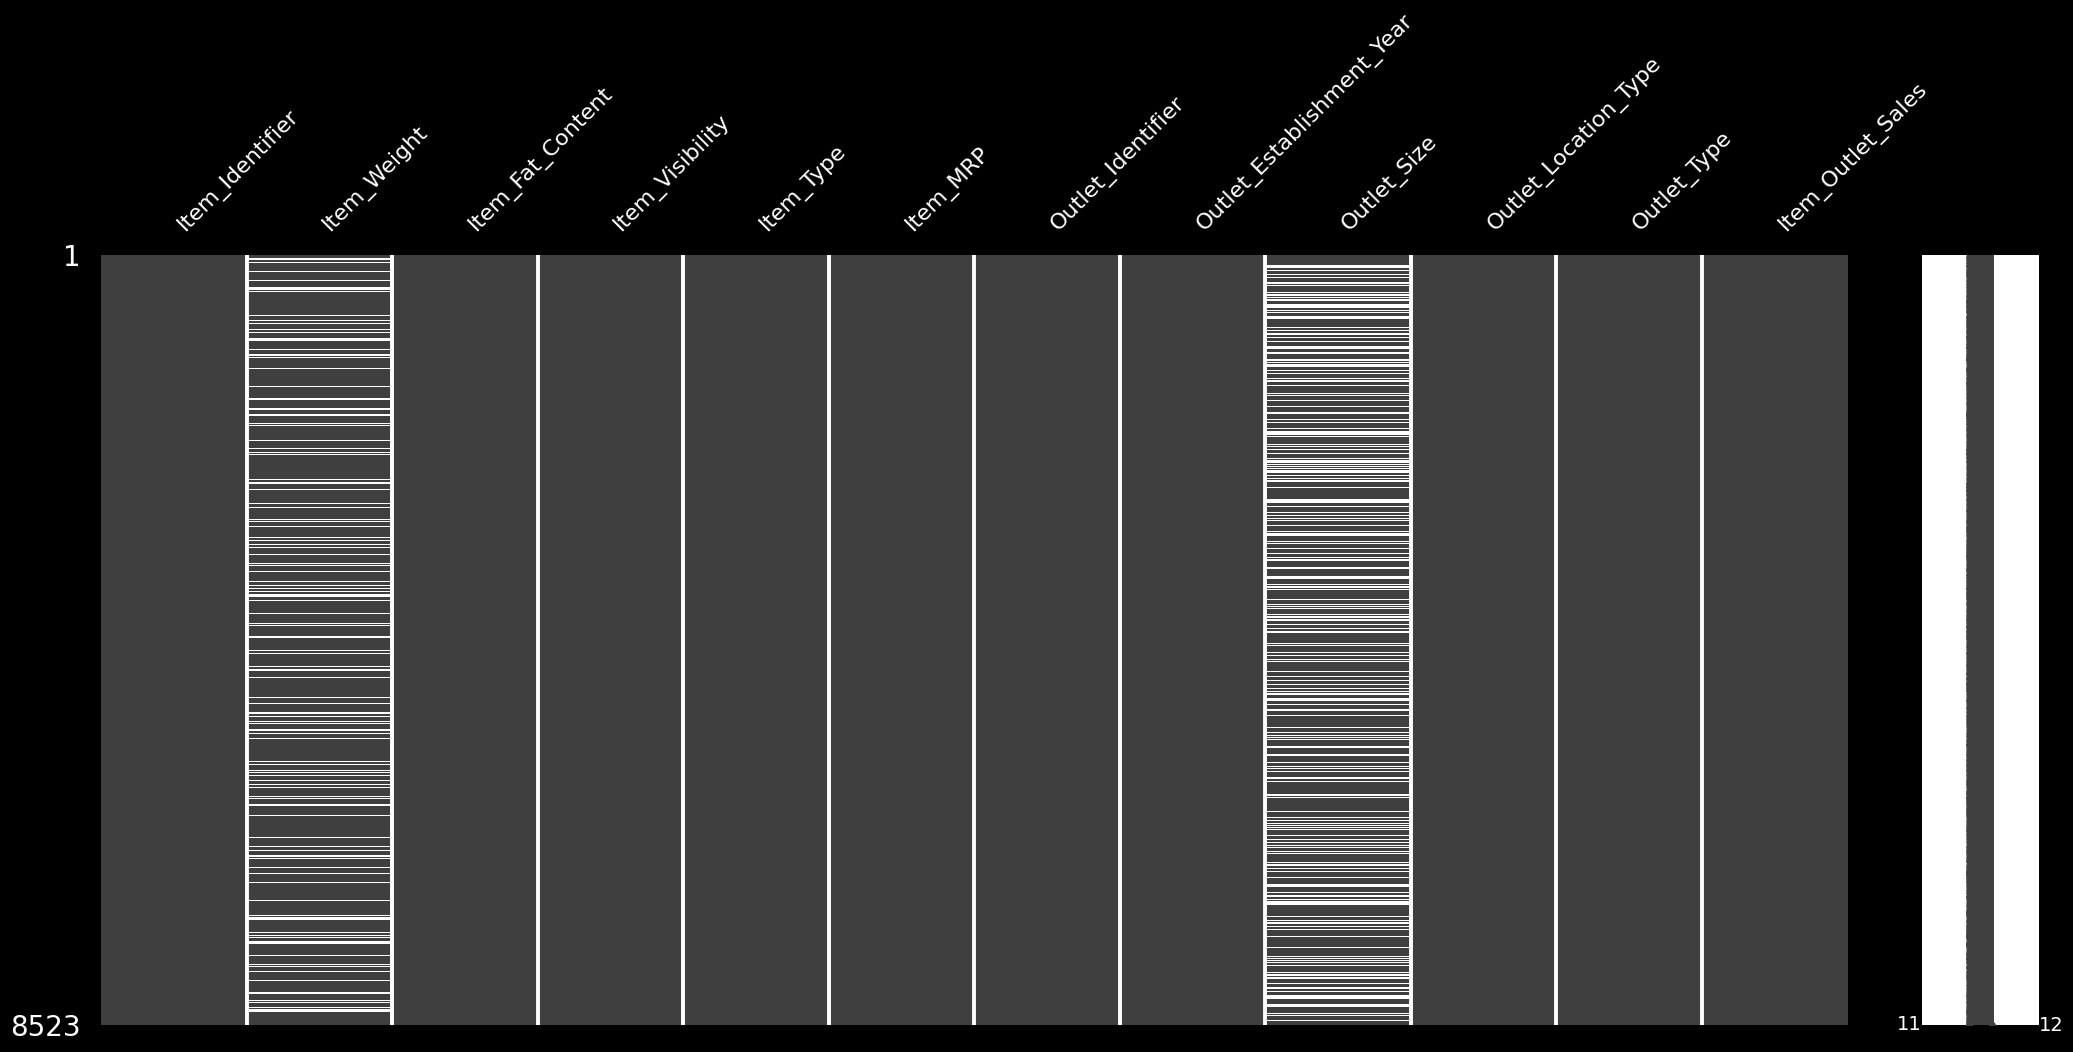

In [113]:
# Visualize the missing values using the missingno package's matrix plot.
import missingno as msno
msno.matrix(df)

#### 1. Working with missing values in 'Item_Weight' column

In [115]:
# Creating Filter to find null values of 'Item_Weight'
null_item_weight = df['Item_Weight'].isna()
# Getting 5 rows with filter applied
df[null_item_weight].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [116]:
# Using value_counts()
df['Item_Weight'].value_counts().sort_index()

4.555      4
4.590      5
4.610      7
4.615      4
4.635      5
          ..
21.000     6
21.100    17
21.200     5
21.250    24
21.350     7
Name: Item_Weight, Length: 415, dtype: int64

In [117]:
# Using value_counts considering NaN values
df['Item_Weight'].value_counts(dropna=False)

NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [118]:
# Using describe()
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

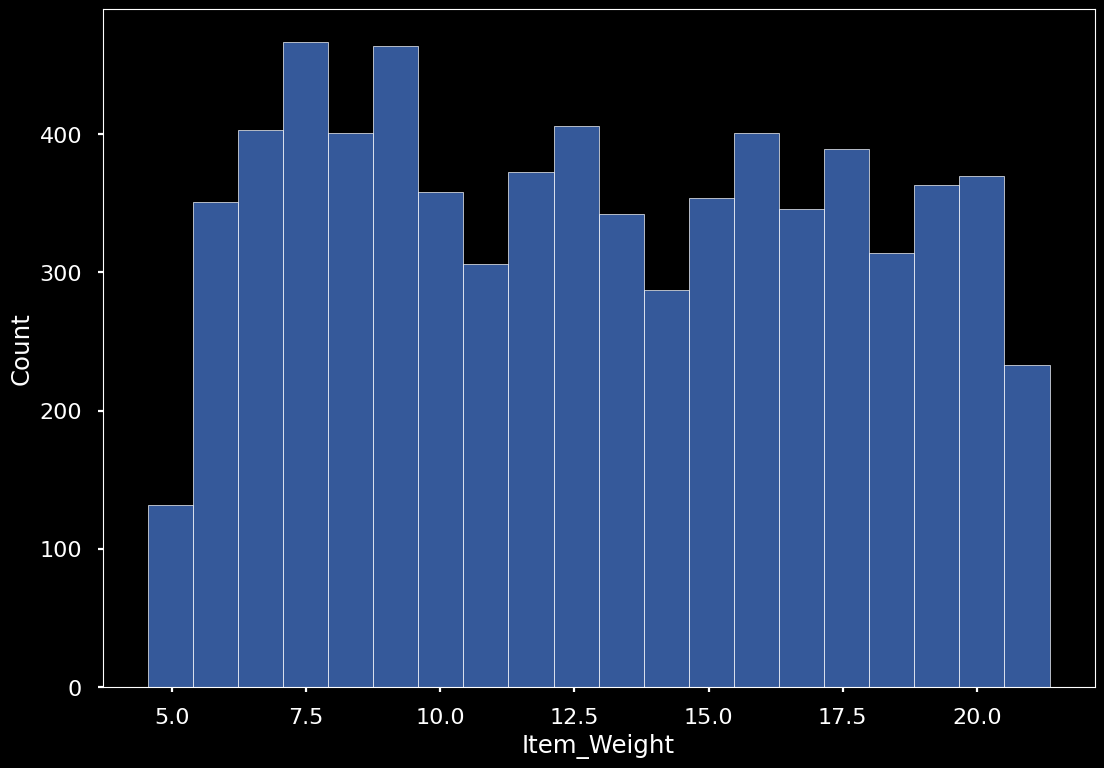

In [119]:
# Displaying graph with results for 'Outlet_Size' (withoutout considering NaN values)
ax = sns.histplot(data = df, x = 'Item_Weight')

There is no way to guess the correct Item_Weight. Given the fact that that column is a float, we will replace all missing values with -1

In [120]:
# Replacing missing values with -1
df['Item_Weight'] = df['Item_Weight'].fillna(-1)
# Checking 5 rows with filter applied
df[null_item_weight].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,-1.0,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,-1.0,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,-1.0,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,-1.0,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,-1.0,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


#### 2. Working with missing values in 'Outlet_Size' column

In [121]:
# Creating Filter to find null values of 'Outlet_Size'
null_outlet_size = df['Outlet_Size'].isna()
# Getting 5 rows with filter applied
df[null_outlet_size].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [122]:
# Using value_counts
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [123]:
# Using value_counts considering NaN values
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

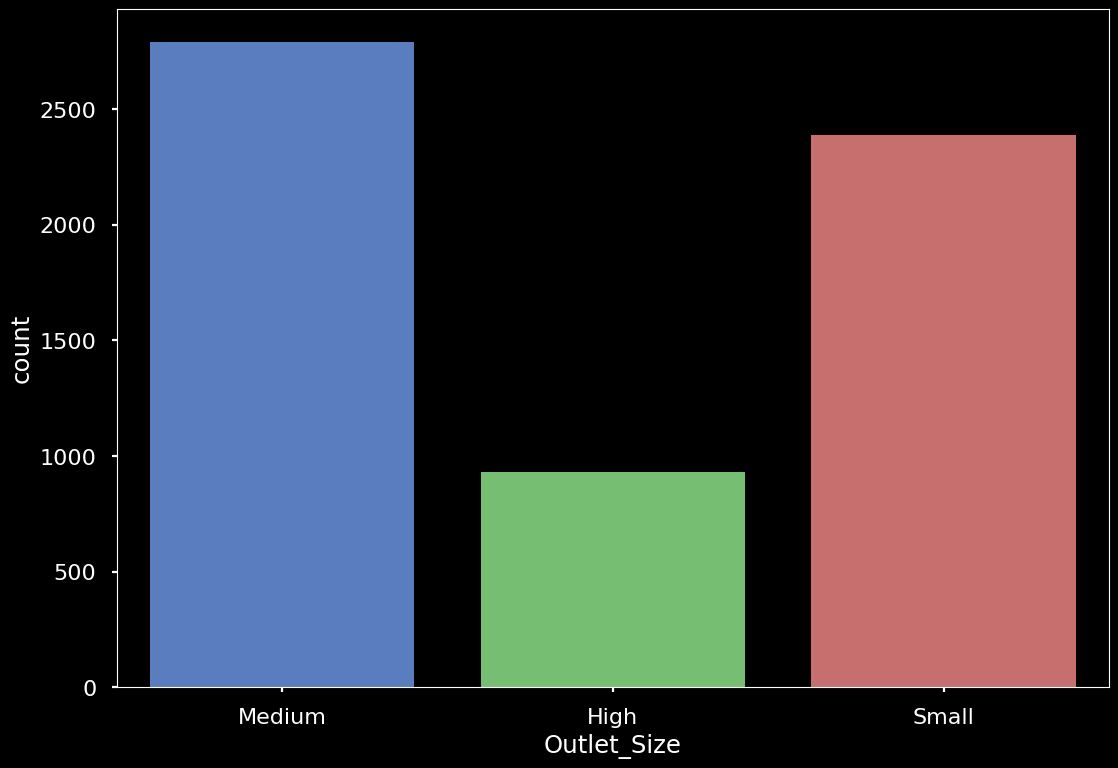

In [124]:
## Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background','seaborn-v0_8-muted', 'seaborn-v0_8-poster'])
# Displaying graph with results for 'Outlet_Size' (without NaN values)
ax = sns.countplot(data = df, x = 'Outlet_Size');

In [125]:
# Checking relationship between 'Outlet_Type' and 'Outlet_Size' to see any pattern
df.groupby('Outlet_Type')["Outlet_Size"].value_counts().unstack().fillna(0)

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0.0,0.0,528.0
Supermarket Type1,932.0,930.0,1860.0
Supermarket Type2,0.0,928.0,0.0
Supermarket Type3,0.0,935.0,0.0


At last, for missing values of 'Outlet_Size' we select to fill them with the word `Unknown`

In [126]:
# Replacing missing values with -1
df['Outlet_Size'] = df['Outlet_Size'].fillna('Unknown')

In [127]:
# Using value_counts once again
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

### 6. Confirm that there are no missing values after addressing them.

In [128]:
# Confirm no more NaN values using isna() and sum()
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: >

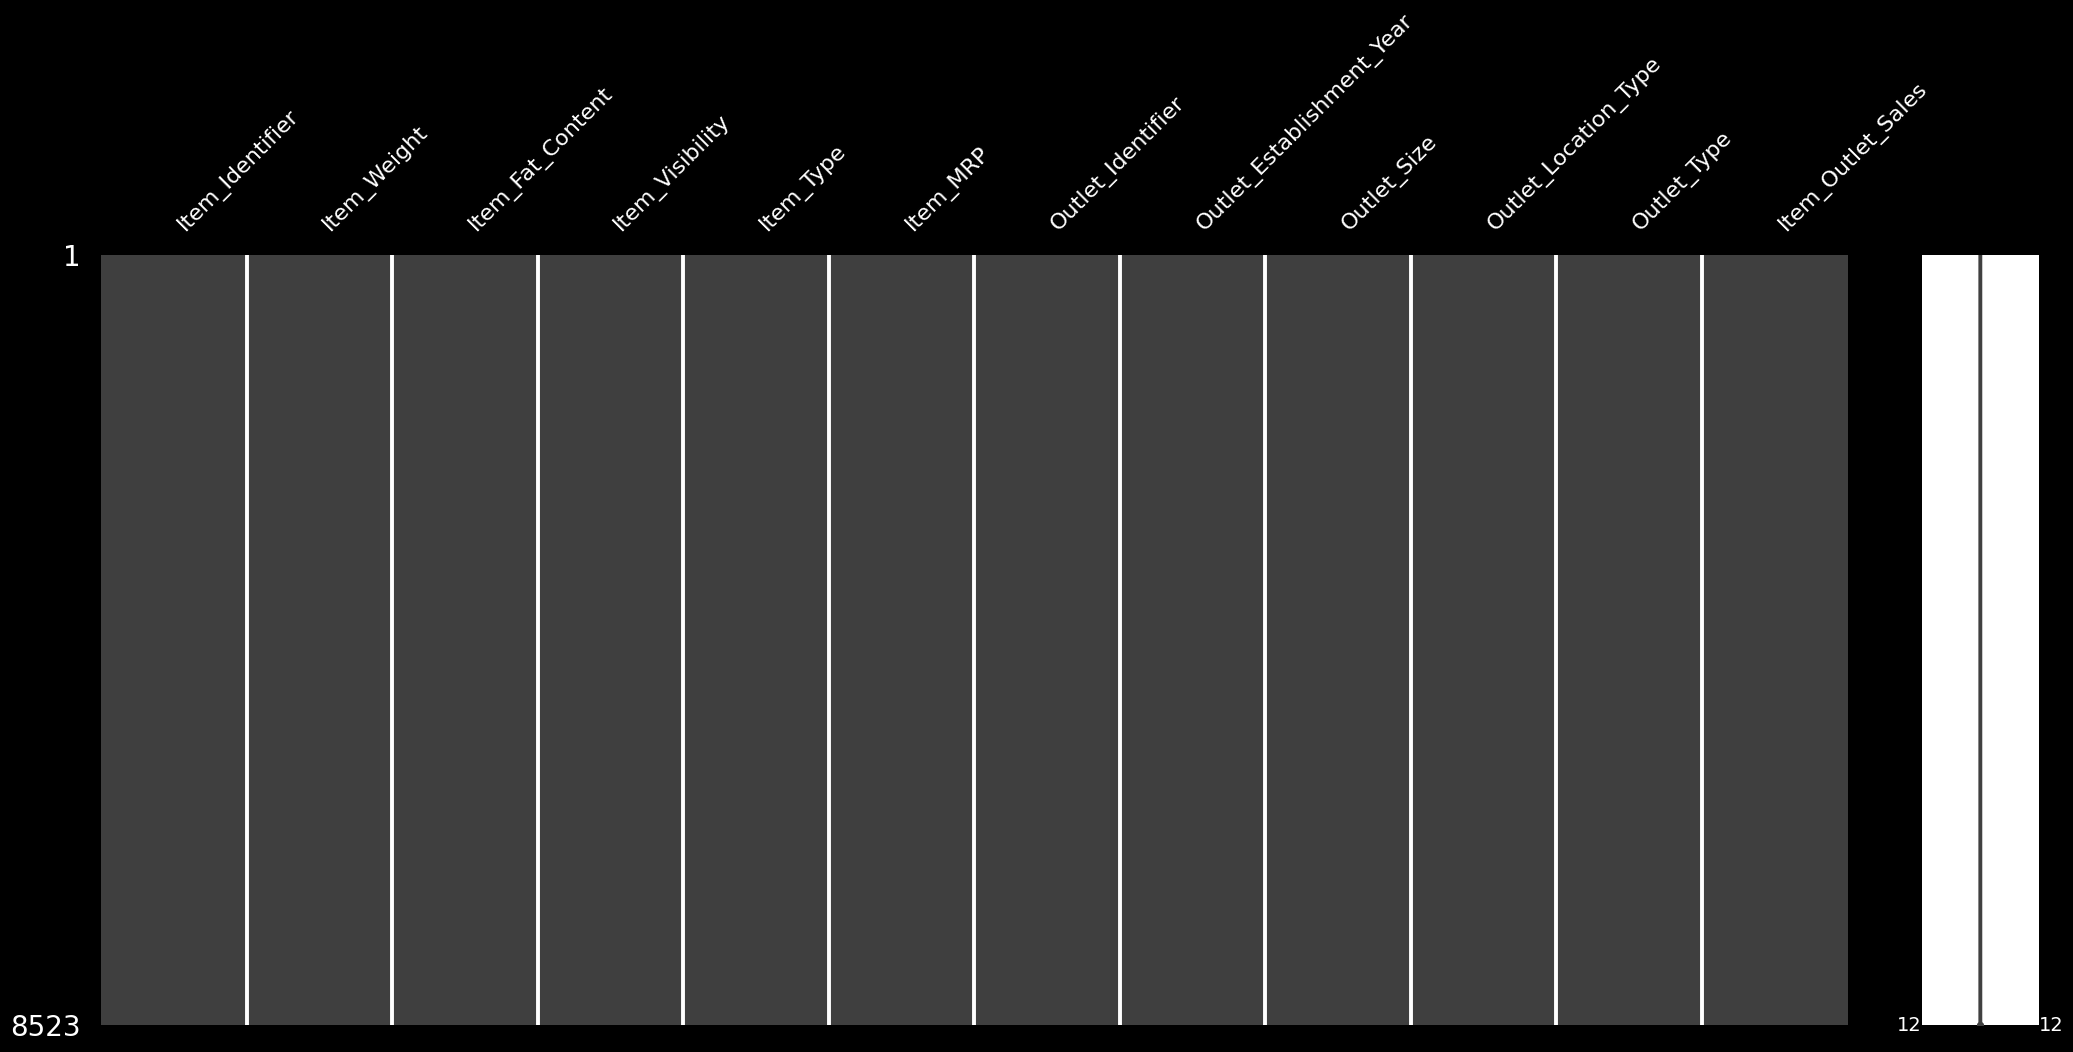

In [129]:
# Confirm no more nulls using using missingno
msno.matrix(df)

### 7. Find and fix any inconsistent categories of data.

**Example**: fix cat, Cat, and cats so that they are consistent.

In [130]:
# Save columns that contain string values in string_cols
string_cols = df.select_dtypes("object").columns
# Loop through the list of string columns
for col in string_cols:
  # Increasing readability by adding an empty line
  print(f"Value Counts for {col}")
  print(df[col].value_counts(dropna=False))
  # print the value counts for the column
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


- Upon review Item_Fat_Content column needs some renaming for inconsisten values
  - Change 'LF' to 'Low Fat'
  - Change 'low fat' to 'Low Fat'
  - Change 'reg' to 'Regular'

In [131]:
# Create dictionary for replacement
dict_replacement = {'LF': 'Low Fat',
                    'low fat': 'Low Fat',
                    'reg': 'Regular'}
# Replace inconsisten values
df['Item_Fat_Content'].replace(dict_replacement, inplace = True)
# Check value counts to confirm change
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### 8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [132]:
# Using df.describe() to view the summary statistics for the numeric features.
df.describe().round(2).loc[['min', 'max', 'mean']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,-1.00,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96
mean,10.48,0.07,140.99,1997.83,2181.29


Here, we see that 'Item_Weight' considers on its analysis -1 values. We include a filter for that

In [133]:
# Using df.describe() to view the summary statistics for the numeric features with considering -1 values.
df[df != -1].describe().round(2).loc[['min', 'max', 'mean']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.56,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96
mean,12.86,0.07,140.99,1997.83,2181.29


We can run the same analysis with the code below

In [134]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Iterate over numerical columns to get statistics excluding -1 values
for col in numerical_cols:
    print(f"Column: {col}")
    # Filter for -1 values (previously NaN)
    minus_one_filter = df[col] != -1
    print(df[minus_one_filter][col].describe().round(2).loc[['min','max','mean']])
    print("-" * 20)


Column: Item_Weight
min      4.56
max     21.35
mean    12.86
Name: Item_Weight, dtype: float64
--------------------
Column: Item_Visibility
min     0.00
max     0.33
mean    0.07
Name: Item_Visibility, dtype: float64
--------------------
Column: Item_MRP
min      31.29
max     266.89
mean    140.99
Name: Item_MRP, dtype: float64
--------------------
Column: Outlet_Establishment_Year
min     1985.00
max     2009.00
mean    1997.83
Name: Outlet_Establishment_Year, dtype: float64
--------------------
Column: Item_Outlet_Sales
min        33.29
max     13086.96
mean     2181.29
Name: Item_Outlet_Sales, dtype: float64
--------------------


- Upon review no strange values are found

### 9. Saving Clean Data

In [135]:
#save filepath
fpath_out = "/content/drive/MyDrive/Coding_Dojo_Data_Science_Excercises/FP_Prediction_of_Product_Sales/data/sales_predictions_2023_clean.csv"
df.to_csv(fpath_out, index=True)

In [136]:
# Loading and inspecting saved file
loaded = pd.read_csv(fpath_out)
loaded.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

## Feature Inspection